In [408]:
import os
from pathlib import Path

iskaggle = os.environ.get("KAGGLE_KERNEL_RUN_TYPE","")
if iskaggle: path = Path("../input/titanic")
else:
    path = Path("titanic")
    if not path.exists():
        import zipfile, kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f"{path}.zip").extractall(path)

In [409]:
import torch, numpy as np, pandas as pd

np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140,sci_mode=False,edgeitems=7)
pd.set_option('display.width',140)

In [410]:
!pip install pandas

In [411]:
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [412]:
df.isna() #is not a number use for missing data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [413]:
df.isna().sum()# sum each element in row

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [414]:
modes=df.mode().iloc[0] #The mode of a set of values is the value that appears most often. It can be multiple values. if all are 1 then choose the first according to vocab
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [415]:
df.fillna(modes,inplace=True) #panda auto match column to colum

In [416]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Long tail distribution
Alots small values and vice versa

Linear model dont approriate to this

<AxesSubplot: >

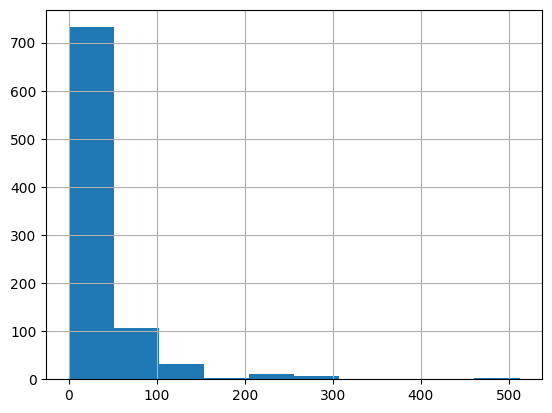

In [417]:
df['Fare'].hist()

### Change long tail to reasonably centered distribution
Use log

In [418]:
df['LogFare']=np.log(df['Fare']+1)

<AxesSubplot: >

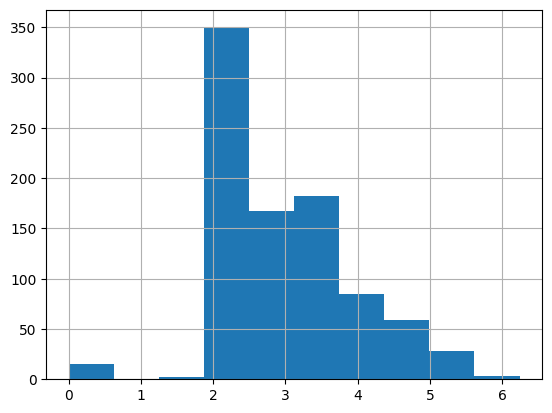

In [419]:
df['LogFare'].hist()

In [420]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [421]:
df.describe(include=(object))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [422]:
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked'])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [423]:
added_column=['Sex_male', 'Sex_female',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_column].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [424]:
from torch import tensor

t_dep=tensor(df.Survived)

In [425]:
indep_cols=['Age','SibSp','Parch','LogFare']+added_column

t_indep=tensor(df[indep_cols].values,dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [426]:
t_indep.shape #row and collumn

torch.Size([891, 12])

In [427]:
len(t_indep.shape) #vector rank 1, matrix rank 2, scalar(vô hướng) rank 3

2

In [428]:
torch.manual_seed(442) #Computer in general cant create rand number, this manual make the rand is fixed
n_coeffs=t_indep.shape[1]
coeffs = torch.rand(n_coeffs)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [429]:
t_indep * coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

In [430]:
tensor([1,2,3])*tensor([2,3,4])

tensor([ 2,  6, 12])

In [431]:
vals,index_max=t_indep.max(dim=0)#dim =0 max in collumn
vals


tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000])

In [432]:
index_max#vi tri max

tensor([630, 159, 678, 258,   0,   1,   1,   9,   0,   1,   5,   0])

In [433]:
t_indep=t_indep/vals

In [434]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [435]:
preds=(t_indep*coeffs).sum(axis=1) #add collumn
preds

tensor([     0.1927,     -0.6239,      0.0979,      0.2056,      0.0968,      0.0066,      0.1306,      0.3476,      0.1613,     -0.6285,
             0.2579,      0.0796,      0.1836,      0.2457,      0.1676,     -0.0595,      0.2014,      0.1783,      0.0589,     -0.6892,
             0.0909,      0.1205,      0.0089,      0.2945,      0.2614,      0.1999,     -0.6378,      0.4071,     -0.0425,      0.1611,
            -0.5679,     -0.5688,     -0.0420,     -0.0576,     -0.5197,      0.2173,     -0.6378,      0.1778,      0.1515,     -0.6284,
             0.0284,      0.1104,     -0.6406,     -0.4960,     -0.0136,      0.1605,      0.0038,     -0.0420,     -0.6399,      0.1345,
             0.3138,      0.1788,     -0.6902,      0.0915,     -0.7009,      0.3176,      0.1514,     -0.6638,      0.3084,      0.3422,
            -0.6262,      0.1563,      0.1831,      0.3664,     -0.4753,     -0.6049,      0.1051,      0.1890,      0.2996,      0.1812,
             0.1392,      0.2618, 

In [436]:
preds[:10]#first 10 element

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

In [437]:
loss=torch.abs(preds-t_dep).mean()
loss

tensor(0.5382)

### Function

In [438]:
def calc_preds(coeffs,indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs,indeps,deps): return torch.abs(calc_preds(coeffs,indeps)-deps).mean()

### Doing a gradient descent step

In [439]:
coeffs.requires_grad_() #in pytorch if there is underscore in the end,  that changes directly the content of  making a copy.Ex  a+= b is equivalent to a= operator.iadd(a, b)

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [440]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [441]:
loss.backward()#The backward() method in Pytorch is used to calculate the gradient, the gradient of a tensor is calculated for the one having requires_grad is set to True
#loss is func backwward

In [442]:
coeffs.grad#slope của mỗi hệ số

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

In [443]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1)
    print(calc_loss(coeffs,t_indep,t_dep))
    

tensor(0.5197)


In [444]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)


In [445]:
val_split

(#178) [303,778,531,385,134,476,691,443,386,128...]

In [446]:
trn_indep,val_indep =  t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep     =  t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [447]:
def update_coeffs(coeffs,lr):   coeffs.sub_(coeffs.grad*lr)

In [448]:
def one_epoch(coeffs,lr):
    loss=calc_loss(coeffs,trn_indep,trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs,lr)
    print(f'{loss:.3f}',end=';')#end prevent new line
    

In [449]:
def init_coeffs(): return (torch.rand(n_coeffs)-0.5).requires_grad_()

In [450]:
def train_model(epochs=30,lr=0.01):
    torch.manual_seed(442)
    coeffs=init_coeffs()
    for i in range(epochs): one_epoch(coeffs,lr=lr)
    return coeffs

In [451]:
coeffs=train_model(18,lr=0.02)

0.536;0.532;0.525;0.515;0.503;0.489;0.477;0.466;0.449;0.424;0.396;0.373;0.354;0.338;0.321;0.306;0.297;0.295;

In [452]:
def show_coeffs(): return dict(zip(indep_cols,coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2335),
 'SibSp': tensor(0.1025),
 'Parch': tensor(0.2530),
 'LogFare': tensor(0.1073),
 'Sex_male': tensor(-0.4166),
 'Sex_female': tensor(0.3314),
 'Pclass_1': tensor(0.8639),
 'Pclass_2': tensor(0.4225),
 'Pclass_3': tensor(0.2875),
 'Embarked_C': tensor(0.1840),
 'Embarked_Q': tensor(0.3267),
 'Embarked_S': tensor(0.1158)}

##### Explained: All older people have less change to survive

### Measuring accuracy

In [453]:
preds=calc_preds(coeffs,val_indep)

In [454]:
res=val_dep.bool()==(preds>0.5)
res[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [455]:
res.float().mean()

tensor(0.7921)

In [456]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs,val_indep)>0.5)).float().mean()

In [457]:
acc(coeffs)

tensor(0.7921)

### Using sigmoid

In [458]:
preds[:28]

tensor([ 1.0550,  0.1648,  0.0210,  0.1432,  0.0940,  0.0883,  0.8792,  0.8332,  0.1986,  0.8419, -0.0691,  0.0877,  0.0729,  0.9130,
        -0.0780,  0.4887,  0.4303,  0.8954,  0.0644,  0.6831, -0.0458,  0.4566,  1.4014,  0.8986, -0.0359,  0.1958,  0.8296,  0.4391])

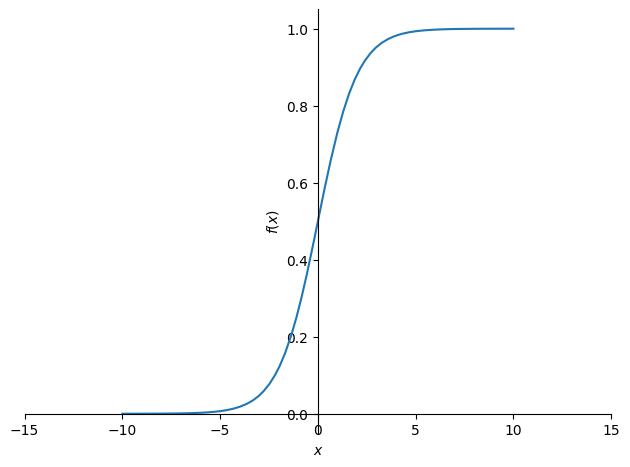

In [459]:

import sympy
sympy.plot("1/(1+exp(-x))",xlim=(-15,15))

In [460]:
def calc_preds(coeffs,indeps): return torch.sigmoid((coeffs*indeps).sum(axis=1))#predefine
calc_preds(coeffs,t_indep)

tensor([0.4929, 0.7949, 0.6674, 0.7842, 0.4806, 0.5414, 0.6162, 0.5286, 0.6863, 0.7249, 0.6958, 0.7683, 0.4915, 0.5390, 0.6751, 0.6809,
        0.5851, 0.5242, 0.6699, 0.6833, 0.5190, 0.5169, 0.7190, 0.6325, 0.6995, 0.7124, 0.5053, 0.6740, 0.7136, 0.4885, 0.6393, 0.8034,
        0.7136, 0.4927, 0.6544, 0.6275, 0.5053, 0.4908, 0.6810, 0.6938, 0.6617, 0.7020, 0.5056, 0.7485, 0.7166, 0.4886, 0.5470, 0.7136,
        0.5160, 0.6782, 0.5308, 0.4907, 0.7898, 0.7015, 0.6353, 0.6353, 0.7006, 0.5020, 0.7330, 0.5423, 0.5067, 0.7817, 0.6273, 0.5388,
        0.6500, 0.5219, 0.6957, 0.4923, 0.7023, 0.4938, 0.5175, 0.7115, 0.5336, 0.5097, 0.4907, 0.4877, 0.4885, 0.4886, 0.5651, 0.6664,
        0.4905, 0.4856, 0.7136, 0.6336, 0.7031, 0.6738, 0.5351, 0.4886, 0.8119, 0.4886, 0.4850, 0.4914, 0.6254, 0.5152, 0.4627, 0.4886,
        0.6190, 0.6633, 0.7041, 0.5229, 0.6661, 0.4885, 0.6500, 0.4823, 0.4855, 0.4856, 0.6705, 0.4885, 0.4783, 0.7199, 0.6211, 0.6943,
        0.4901, 0.6748, 0.6900, 0.4907, 0.5073, 

In [461]:
coeffs#giá trị coeffs

tensor([-0.2335,  0.1025,  0.2530,  0.1073, -0.4166,  0.3314,  0.8639,  0.4225,  0.2875,  0.1840,  0.3267,  0.1158])

In [462]:
coeffs.grad#giá trị khi thế coeffs vào hàm derative

tensor([    -0.7532,      0.2440,     -0.0028,     -1.1063,      1.3072,     -2.8135,     -1.3212,     -0.4376,      0.2525,     -2.8022,
            -0.3562,      1.6522])

In [463]:
coeffs=train_model(lr=2)

0.510;0.468;0.397;0.340;0.309;0.289;0.268;0.247;0.230;0.218;0.210;0.207;0.205;0.204;0.204;0.204;0.204;0.205;0.205;0.205;0.205;0.205;0.205;0.204;0.203;0.202;0.201;0.200;0.198;0.197;

In [464]:
coeffs

tensor([ -1.6562,  -1.1978,  -0.0264,   2.0475, -18.9596,  16.6258,   7.8170,   4.0900, -12.5817,   3.1918,   1.0449,  -5.8589],
       requires_grad=True)

In [465]:
coeffs.grad

tensor([ 0.0273,  0.0477,  0.0248, -0.0250,  0.3275, -0.2738, -0.1401, -0.0813,  0.2751, -0.0714, -0.0267,  0.1518])

In [466]:
acc(coeffs)

tensor(0.8258)

step size= slope*lr(stop when step size close to 0):  with torch.no_grad():